**Inputting the dataset of the games**

In [ ]:
#download the csv from the website: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/
from google.colab import files
files.upload()
import csv
import json

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


**One way of cleaning the data**

In [ ]:
#maybe have to fix this for the machine learning or something
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df['User_Score'].replace('tbd', np.nan, inplace=True)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

for col in ['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']:
    df[col].fillna(df[col].median(), inplace=True)

# Dropping rows with missing values in specified columns
df.dropna(subset=['Genre', 'Platform', 'Publisher', 'Developer', 'Rating'], inplace=True)

categorical_cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Normalizing sales figures
scaler = StandardScaler()
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df_encoded[sales_columns] = scaler.fit_transform(df_encoded[sales_columns])

print(df_encoded.head())


Missing values in each column:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
                    Name  Year_of_Release   NA_Sales   EU_Sales   JP_Sales  \
0             Wii Sports           2006.0  49.989219  49.347594  15.460489   
2         Mario Kart Wii           2008.0  18.711085  21.568312  15.543516   
3      Wii Sports Resort           2009.0  18.625825  18.430282  13.426322   
6  New Super Mario Bros.           2006.0  13.351903  15.360843  26.793703   
7               Wii Play           2006.0  16.616132  15.429434  11.973346   

   Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  ...  \
0    36.730737     49.282

**2 different statistical methods and what data they will be used on**

First Statistical Method: T-Test for Action and Adventure Genres

Second Statistical Method: Chi-Square between Platform and Genre

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency


# T-Test
# Comparing Critic_Scores for Action and Adventure genres
action_scores = df[df['Genre'] == 'Action']['Critic_Score']
adventure_scores = df[df['Genre'] == 'Adventure']['Critic_Score']
t_stat, p_value = ttest_ind(action_scores, adventure_scores, nan_policy='omit')
print("T-Test for Action and Adventure Genre Critic Scores:")
print("T-Statistic:", t_stat, "P-Value:", p_value)

# Chi-Square Test
# Relationship between Platform and Genre
platform_genre_table = pd.crosstab(df['Platform'], df['Genre'])
chi2, p, dof, expected = chi2_contingency(platform_genre_table)
print("Chi-Square Test for Platform and Genre:")
print("Chi2 Statistic:", chi2, "P-Value:", p)

T-Test for Action and Adventure Genre Critic Scores:
T-Statistic: 0.48558362913386866 P-Value: 0.6273028239972323
Chi-Square Test for Platform and Genre:
Chi2 Statistic: 3178.2040471801292 P-Value: 0.0


**Used 3 now machine learning methods - for each, the input features, the feature being
predicted, and a parameter to try to modify for better performancey**

First Machine Learning Method: RandomForestClassifier for Genre, Platform, Publisher, Rating, and User Score

Second Machine Learning Method: KNeighborsClassifier for Genre, Platform, Publisher, Rating, and User Score

Third Machine Learning Method: RandomForestClassifier for only game rating as in ESRB Game Rating (What age should play this game)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df_clean = df.dropna()
df_clean['Success'] = df_clean['Global_Sales'] > df_clean['Global_Sales'].median()
df_encoded = pd.get_dummies(df_clean, columns=['Genre', 'Platform', 'Publisher', 'Rating'])
df_encoded['User_Score'] = pd.to_numeric(df_encoded['User_Score'], errors='coerce')
feature_columns = [col for col in df_encoded.columns if col not in ['Name', 'Developer', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Success']]
features = df_encoded[feature_columns]
target = df_encoded['Success']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
n_estimators_options = [10, 50, 100, 200]
#RandomForestClassifier for Genre, Platform, Publisher, Rating, and User Score
for n_estimators in n_estimators_options:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    rf_accuracy = sum(rf_predictions == y_test) / len(y_test)
    print(f"Random Forest with n_estimators={n_estimators}, Accuracy: {rf_accuracy}")
#KNeighborsClassifier for Genre, Platform, Publisher, Rating, and User Score
n_neighbors_options = [3, 5, 10, 15]
for n_neighbors in n_neighbors_options:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    knn_accuracy = sum(knn_predictions == y_test) / len(y_test)
    print(f"K-Nearest Neighbors with n_neighbors={n_neighbors}, Accuracy: {knn_accuracy}")

<ipython-input-5-20b0bb6d3a65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Success'] = df_clean['Global_Sales'] > df_clean['Global_Sales'].median()


Random Forest with n_estimators=10, Accuracy: 0.7472527472527473
Random Forest with n_estimators=50, Accuracy: 0.7824175824175824
Random Forest with n_estimators=100, Accuracy: 0.7912087912087912
Random Forest with n_estimators=200, Accuracy: 0.7992673992673993
K-Nearest Neighbors with n_neighbors=3, Accuracy: 0.6527472527472528
K-Nearest Neighbors with n_neighbors=5, Accuracy: 0.6564102564102564
K-Nearest Neighbors with n_neighbors=10, Accuracy: 0.6754578754578755
K-Nearest Neighbors with n_neighbors=15, Accuracy: 0.6776556776556777


In [ ]:
#RandomForestClassifier for only game rating as in ESRB Game Rating
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
file_path = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(file_path)
df['User_Score'].replace('tbd', np.nan, inplace=True)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
for col in ['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count']:
    df[col].fillna(df[col].median(), inplace=True)
df.dropna(subset=['Genre', 'Platform', 'Publisher', 'Developer', 'Rating'], inplace=True)
categorical_cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
X = df_encoded.filter(regex='Rating_.*')
y = df_encoded['Global_Sales']
success_threshold = y.median()
y_binarized = (y > success_threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.3, random_state=42)
n_estimators_options = [10, 50, 100, 200]
for n_estimators in n_estimators_options:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    correct_predictions = sum(y_pred == y_test)
    accuracy_manual = correct_predictions / len(y_pred)
    print(f"Random Forest with n_estimators={n_estimators}, Accuracy: {accuracy_manual}")

Random Forest with n_estimators=10, Accuracy: 0.5182701977874623
Random Forest with n_estimators=50, Accuracy: 0.5182701977874623
Random Forest with n_estimators=100, Accuracy: 0.5182701977874623
Random Forest with n_estimators=200, Accuracy: 0.5182701977874623


**6 visualizations, their types, and what will be visualized - at least 4 of different types that aren't from matplotlib**



1.   Critic Scores vs. Sales Scatter Plot
2.   User Ratings vs. Sales Bar Chart
3.   Features vs. Sales Seaborn Heatmap
4.   Stacked Area Chart for Video Game Globals Sales over time by Genre
5.   User Rating Across Different Genres Box Plot Plotly
6.   Global Sales for each Platform Pi Chart








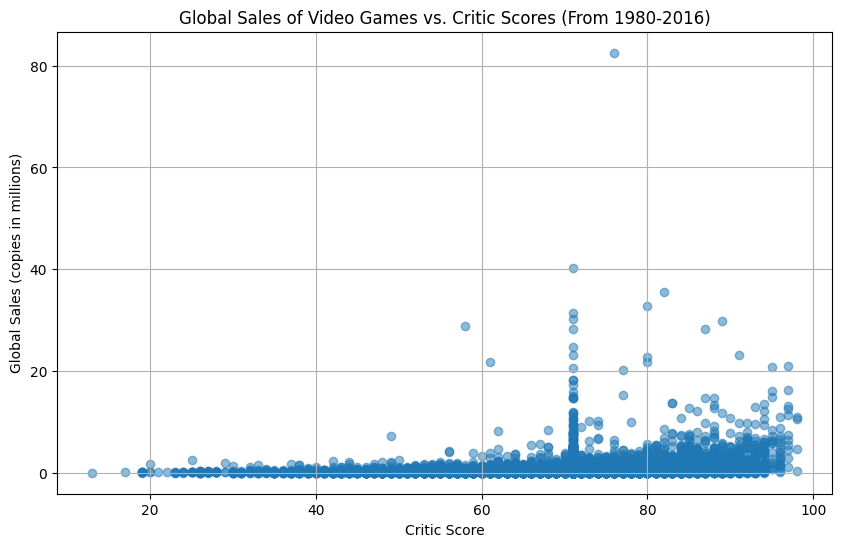

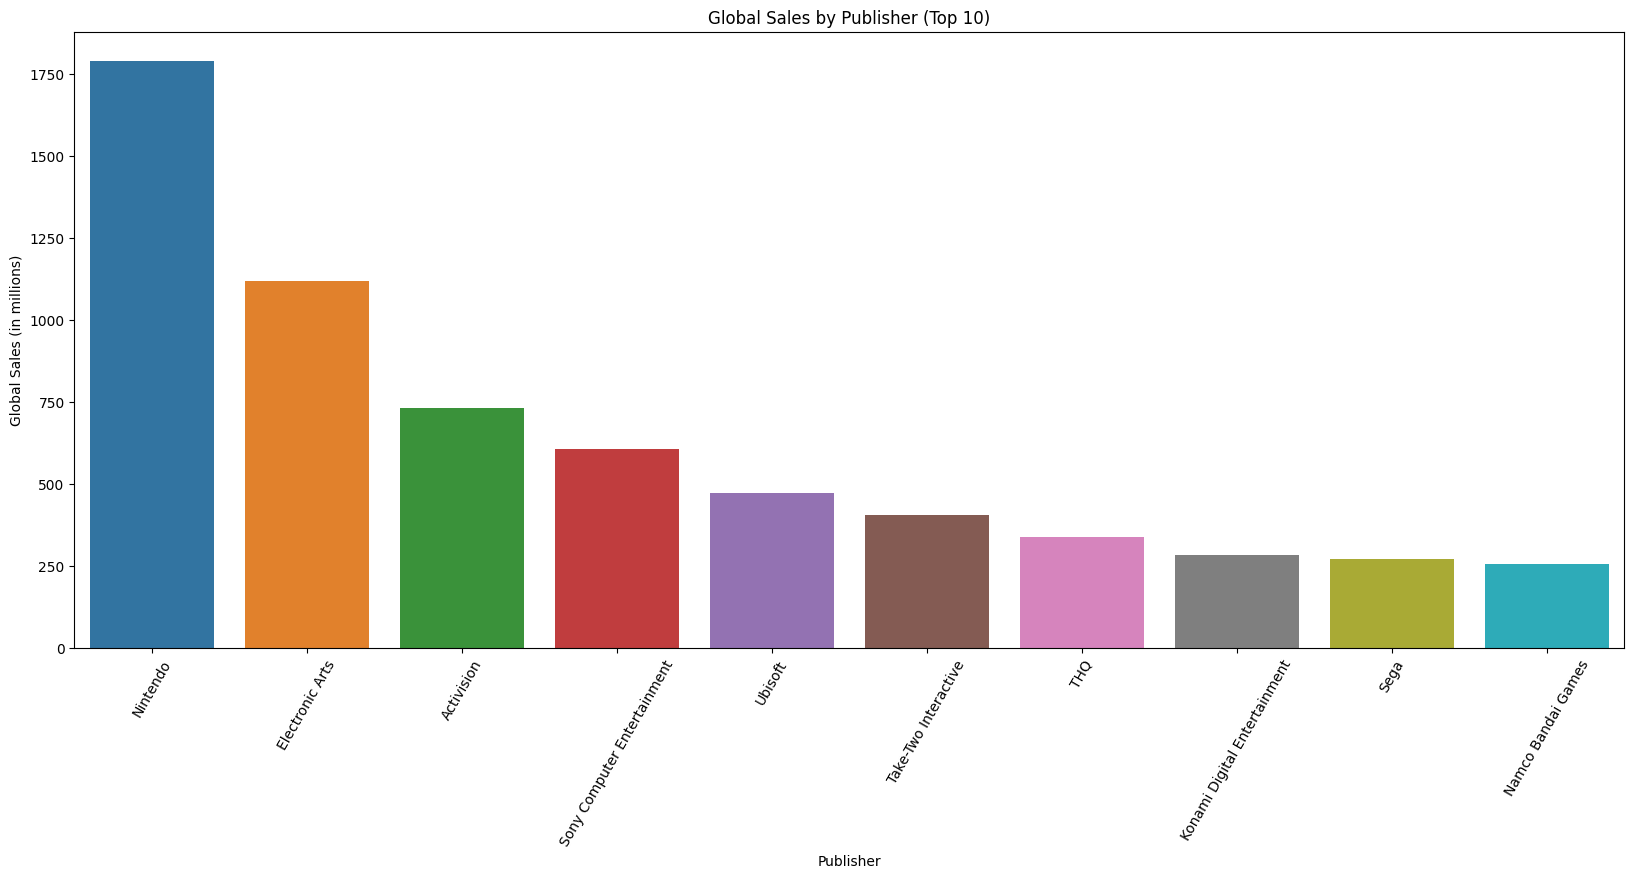

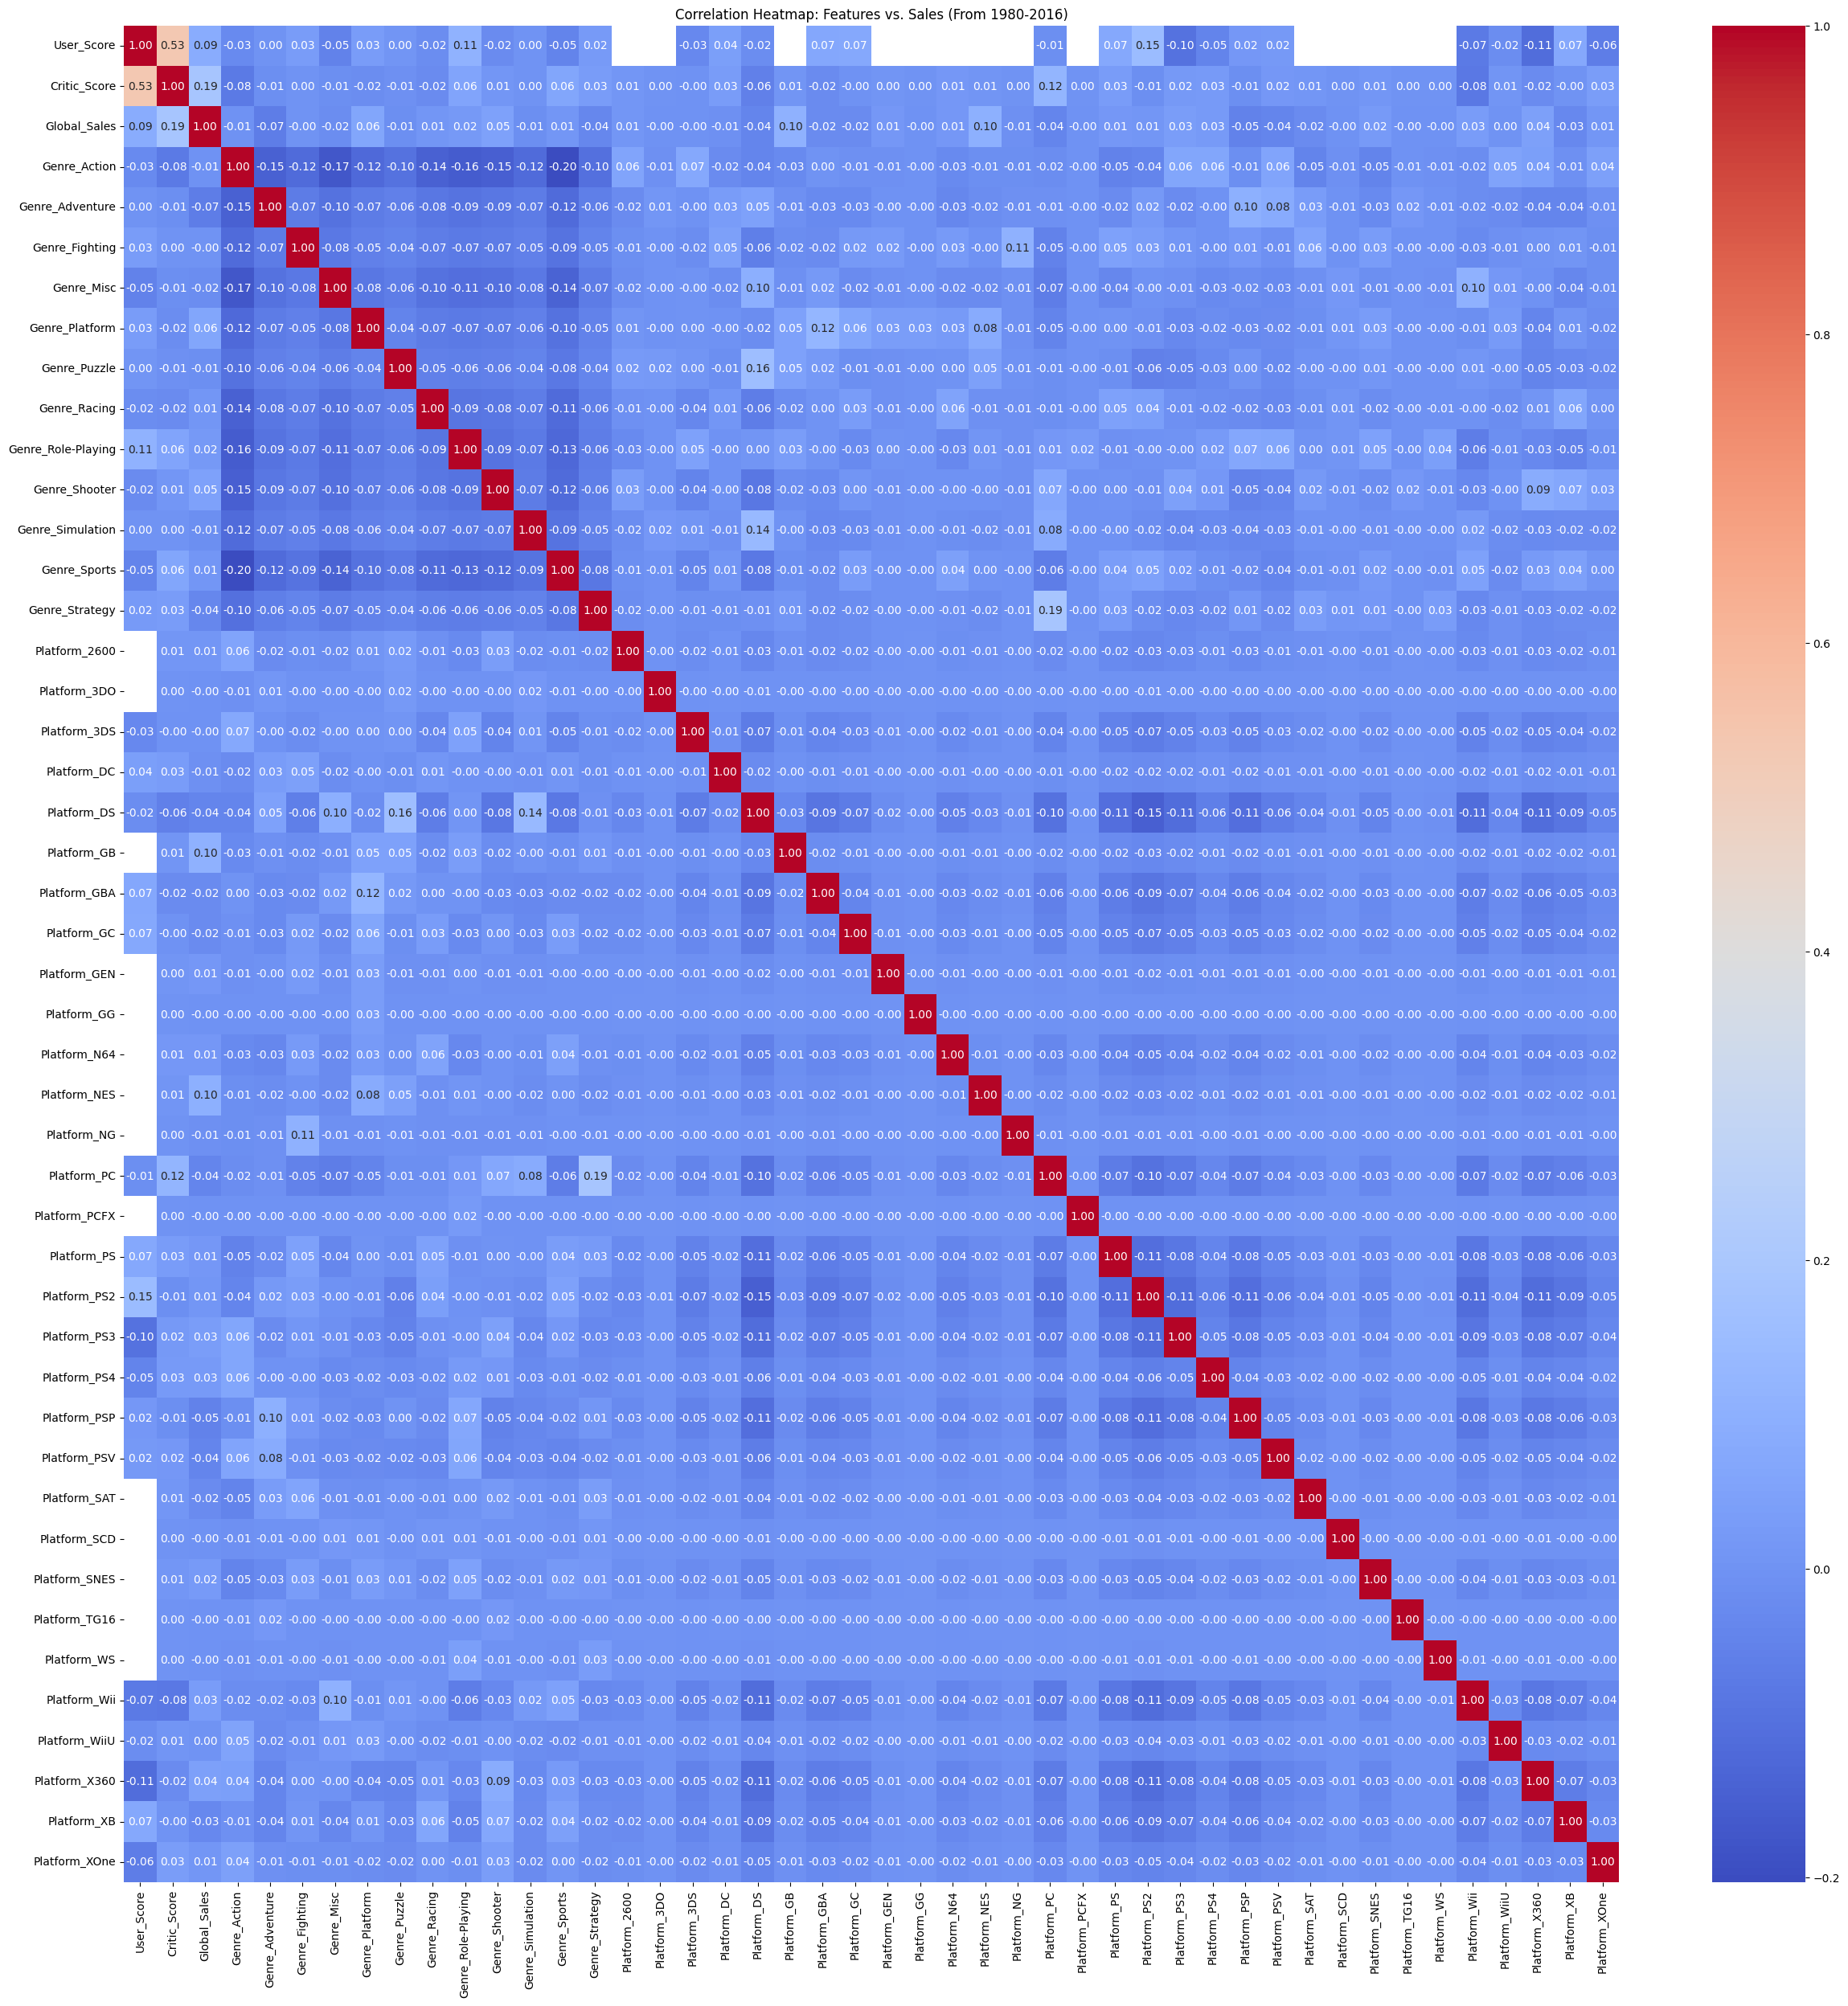

In [ ]:
#To Do

# 1) Critic Scores vs. Sales (Matplotlib Line Chart)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df['User_Score'].replace('tbd', np.nan, inplace=True)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Critic_Score'].fillna(df['Critic_Score'].median(), inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5)
plt.title('Global Sales of Video Games vs. Critic Scores (From 1980-2016)')
plt.ylabel('Global Sales (copies in millions)')
plt.xlabel('Critic Score')
plt.grid(True)
plt.show()




# 2) User Ratings vs. Sales (Matplotlib Scatter Plot)
import seaborn as sns
file_path = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
video_games_df = pd.read_csv(file_path)
video_games_df['User_Score'] = pd.to_numeric(video_games_df['User_Score'], errors='coerce')
publisher_sales = video_games_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 8))  # Increased figure size for better readability
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.title('Global Sales by Publisher (Top 10)')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=60)  # Increased rotation for better label visibility
plt.show()



# 3) Which factors have more significant impacts on sales (Seaborn Heatmap)
selected_columns = ['User_Score', 'Critic_Score', 'Genre', 'Platform', 'Global_Sales']
subset_data = df[selected_columns]
subset_data = pd.get_dummies(subset_data, columns=['Genre', 'Platform'])
correlation_matrix = subset_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Features vs. Sales (From 1980-2016)')
plt.show()








#4. Stacked Area Chart:
# This stacked area chart graph and code have been generated with the assistance of ChatGPT 3, OpenAI, Decemeber 2023
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category20
from bokeh.models import HoverTool
output_notebook()
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Year_of_Release', 'Genre', 'Global_Sales'], inplace=True)
df['Year_of_Release'] = df['Year_of_Release'].astype(int)
grouped = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)
total_sales_per_genre = grouped.sum().sort_values()
ordered_genres = total_sales_per_genre.index.tolist()
p = figure(title="Video Game Sales Over Time by Genre",
           x_axis_label='Year', y_axis_label='Global Sales',
           width=800, height=600)
colors = Category20[len(ordered_genres)] if len(ordered_genres) <= 20 else Category20[20]
for i, genre in enumerate(ordered_genres):
    p.varea_stack(stackers=ordered_genres[:i+1], x='Year_of_Release', color=colors[:i+1], legend_label=genre, source=grouped.reset_index())
hover = HoverTool(tooltips=[("Year", "@Year_of_Release"), ("Genre", "$name"), ("Sales", "@$name")])
p.add_tools(hover)
p.legend.title = 'Genre'
p.legend.location = "top_left"
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Global Sales (Millions)"
p.y_range.start = 0
show(p)




# 5) User rating’s impact on success in each genre (Box Plot Plotly)
import plotly.express as px
fig = px.box(df, x='Genre', y='User_Score',
             title='User Ratings Distribution Across Different Genres (From 1980-2016)',
             labels={'User_Score': 'User Rating', 'Genre': 'Genre'})
fig.update_layout(xaxis_title='Genre', yaxis_title='User Rating')
fig.update_traces(marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)))
fig.show()




# 6) Platform Market Share (Plotly Pie Chart)
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
filtered_platforms = ['PS', 'PS2', 'PS3', 'PS4', 'X360', 'XB', 'XOne', 'Wii', 'PC']
platform_sales = platform_sales[platform_sales['Platform'].isin(filtered_platforms)]
fig = px.pie(platform_sales, values='Global_Sales', names='Platform', title='Platform Market Share in Video Game Sales (From 1980-2016) ')
fig.show()
